In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
PI = math.pi
exp = math.exp
sin = math.sin

In [3]:
u = lambda x, t: 1/(PI**2)*(1-exp(-(PI**2)/t))*sin(PI*x)

In [4]:
t = 5
x_arr = np.linspace(0,1,100)
u_arr = [u(i,t) for i in x_arr]

In [5]:
def u2(dx, dt, t):
    X_values = round(1/dx+1)
    T_values = round(t/dt+1)
    x_arr = [i*dx for i in range(X_values)]
    Unk = np.empty((T_values, X_values))
    
    for i in range(X_values):
        Unk[0][i] = 0
    for i in [0, X_values-1]:
        for j in range(T_values):
            Unk[j][i] = 0
    
    for k in range(0, T_values-1):
        for n in range(1, X_values-1):
            Unk[k+1][n] = dt/(dx**2)*Unk[k][n-1]+(1-2*dt/(dx**2))*Unk[k][n]+dt/dx**2*Unk[k][n+1]+dt*sin(PI*x_arr[n])
    return x_arr, Unk[T_values-1]

dx=0.025
dt=dx**2/8
x2_arr, u2_arr = u2(dx, dt, t)

In [6]:
def show_plot(x_arr, u_arr, x2_arr, u2_arr, t):
    plt.figure(figsize=(10, 8))
    plt.plot(x_arr, u_arr, 'red')
    plt.plot(x2_arr, u2_arr, 'blue')
    plt.title(r'Зависимость $U(x,t='+str(t)+')$ ', size=14)
    plt.xlabel(r'$x$', size=14)
    plt.ylabel(r'$U$', size = 14)
    plt.grid(True)
    plt.show()

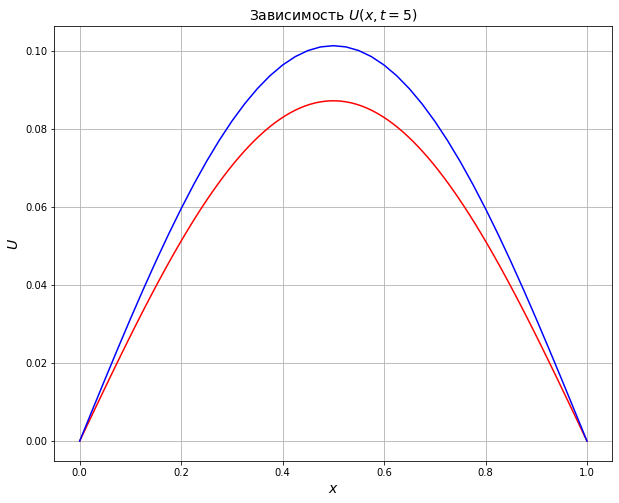

In [7]:
show_plot(x_arr, u_arr, x2_arr, u2_arr, t)